# Forward Kinematics tutorial

we'll demonstrate forward kinematics on a baxter robot

## Setup

In [1]:
import numpy as np

from pykin.robots.bimanual import Bimanual
from pykin.kinematics.transform import Transform
from pykin.utils import plot_utils as plt

# support for changing text color in terminal 
from pykin.utils.kin_utils import ShellColors as sc

In [2]:
# baxter_example
file_path = '../asset/urdf/baxter/baxter.urdf'
robot = Bimanual(file_path, Transform(rot=[0.0, 0.0, 0.0], pos=[0, 0, 0]))

In [3]:
# set the angles you want
# Either list or np.array type doesn't matter
head_thetas = [0.0]
right_arm_thetas = [np.pi/3, -np.pi/5, -np.pi/2, np.pi/7, 0, np.pi/7 ,0]
left_arm_thetas = [0, 0, 0, 0, 0, 0, 0]

# If you set thetas with numpy, you can concatenate using concatenate or hstack method
thetas = head_thetas + right_arm_thetas + left_arm_thetas
print(thetas)

[0.0, 1.0471975511965976, -0.6283185307179586, -1.5707963267948966, 0.4487989505128276, 0, 0.4487989505128276, 0, 0, 0, 0, 0, 0, 0, 0]


## Compute Forward Kinematics

In [4]:
transformations = robot.forward_kin(thetas)

In [5]:
for link, transform in transformations.items():
    print(f"{sc.HEADER}{link}{sc.ENDC}, {transform.rot}, {transform.pos}")

base, [1. 0. 0. 0.], [0. 0. 0.]
collision_head_link_1, [1. 0. 0. 0.], [0.11 0.   0.75]
collision_head_link_2, [1. 0. 0. 0.], [0.11 0.   0.75]
torso, [1. 0. 0. 0.], [0. 0. 0.]
left_torso_itb, [ 3.27579908e-05 -3.27579908e-05  7.07106780e-01  7.07106780e-01], [-0.08897   0.15593   0.389125]
right_torso_itb, [0.70710678 0.70710678 0.         0.        ], [-0.08897  -0.15593   0.389125]
pedestal, [1. 0. 0. 0.], [0. 0. 0.]
head, [1. 0. 0. 0.], [0.06  0.    0.686]
dummyhead1, [1. 0. 0. 0.], [0.06  0.    0.686]
screen, [0.45309853 0.54286437 0.54286437 0.45309853], [0.1827 0.     0.686 ]
display, [0.45309853 0.54286437 0.54286437 0.45309853], [1.79839090e-01 1.40096268e-14 6.70257853e-01]
head_camera, [0.45309853 0.54286437 0.54286437 0.45309853], [0.18839 0.      0.74968]
sonar_ring, [1. 0. 0. 0.], [0.0947 0.     0.817 ]
right_arm_mount, [ 0.92387918  0.          0.         -0.38268428], [ 0.024645 -0.219645  0.118588]
right_upper_shoulder, [0.99144498 0.         0.         0.13052528], [ 0.

you can do visualization using plot_utils module

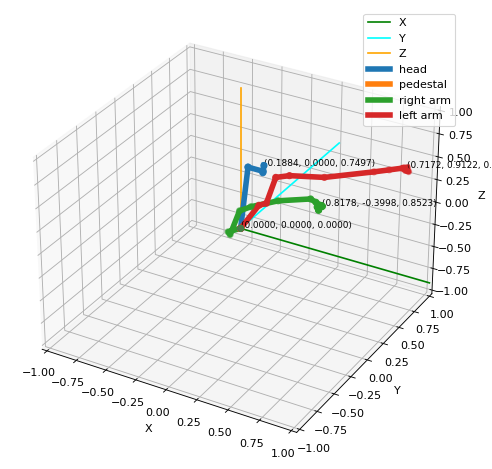

In [6]:
_, ax = plt.init_3d_figure()
plt.plot_robot(
    robot=robot,
    ax=ax,
    transformations=transformations
)
plt.show_figure()